# Linear regression

## Libraries and settings

In [1]:
# Libraries
import os
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

c:\Users\lukas\OneDrive\Prototyping\SBBAnalytics\SBBAnalytics


## Import the Passagierfrequenz data

In [9]:
import pandas as pd

columns = ['Code', 
           'Bahnhof', 
           'Kanton', 
           'Jahr', 
           'DTV']

# Lese die Datei und wähle die relevanten Variablen aus
df_orig = pd.read_csv("data_prepared.csv", 
                      sep=",", 
                      encoding="utf-8")[columns]

# Benenne die Spalte 'Code' um in 'station_id'
df_orig = df_orig.rename(columns={'Code': 'station_id'})

# Entferne fehlende Werte
df = df_orig.dropna()

# Entferne Duplikate
df = df.drop_duplicates()

# Filtere nur Einträge mit einem Verkehrswert zwischen 1.000 und 50.000
df = df.loc[(df['DTV'] >= 1000) & 
            (df['DTV'] <= 50000)]

# Zeige die Form und die ersten 5 Zeilen des bereinigten DataFrames
print(df.shape)
df.head(5)

(1225, 5)


,station_id,Bahnhof,Kanton,Jahr,DTV
4,ABO,Aarburg-Oftringen,AG,2022,2500
10,ALT,Altstätten SG,SG,2023,4300
11,AND,Andermatt,UR,2018,2700
12,ARB,Arbon,TG,2018,1700
16,AU,Au ZH,ZH,2023,1100


## Simple linear regression (only one explanatory variable in the model)
For details see: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

### Create train and test samples (train = 80%, test = 20% of the data)

In [10]:
# Create train and test samples
X_train, X_test, y_train, y_test = train_test_split(df[['station_id', 'Bahnhof', 'Kanton', 'Jahr']], 
                                                    df['DTV'], 
                                                    test_size=0.20, 
                                                    random_state=42)

# Show X_train
print('X_train:')
print(X_train.head(), '\n')

# Show y_train
print('y_train:')
print(y_train.head())

X_train:
     station_id            Bahnhof Kanton  Jahr
1032        LIT             Littau     LU  2018
869         EBR        Emmenbrücke     LU  2018
3115        KLO     Klosters Platz     GR  2022
31         BDFS  Burgdorf Steinhof     BE  2023
1486        BSC         Bassecourt     JU  2023 

y_train:
1032    1000
869     4800
3115    2800
31      1500
1486    1300
Name: DTV, dtype: int64


### Fit the simple linear regression model

In [11]:
# Fit the regression model
slope, intercept, r, p, std_err = stats.linregress(X_train['Jahr'], y_train)

# Print results of the regression model
print('Linear regression result:')
print(f'Intercept with y-axis (alpha):            {intercept:.2f}')
print(f'Slope of regression line (beta):          {slope:.3f}')
print(f'p-value:                                  {p:.4f}')
print(f'R-squared (coefficient of determination): {r**2:.4f}')

Linear regression result:
Intercept with y-axis (alpha):            -102860.24
Slope of regression line (beta):          53.467
p-value:                                  0.6032
R-squared (coefficient of determination): 0.0003


### Plot regression line

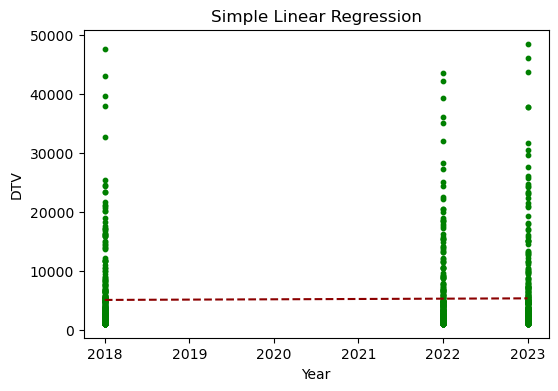

In [12]:
# Function to calculate model predictions
def myfunc(x):
    return slope * x + intercept

# Apply myfunc() to x, i.e. make predictions 
mymodel = pd.Series(map(myfunc, X_train['Jahr']))

# Scatterplot with regression line
plt.figure(figsize=(6,4))
plt.scatter(X_train['Jahr'], y_train, s=10, color='green')
plt.plot(X_train['Jahr'], mymodel, color='darkred', linestyle='dashed')
plt.title('Simple Linear Regression')
plt.xlabel('Year')
plt.ylabel('DTV')

plt.show()

### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [ ]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')